# Cyclistic Bike Share - Case Study

## Introduction

In this case study. I'll be working with a fictional company called Cyclistic as a Junior Data Analyst. Cyclistic is a bike sharing company in Chicago. They offer a bike share program that features more than 5800 bikes and 600 docking stations. 

Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

The business task here is to understand how casual riders and annual members use Cyclistic bikes differently which will be used to design a new marketing strategy to convert casual riders into annual members.

As a Junior Data Analyst, I have been assigned the task of understanding how annual members and casual riders differ which would guide the marketing strategy team in converting casual riders to annual members.


## PHASE 1 - Ask

Identify the Business Task

In this phase, I will need to understand the business question or the problem the company is trying to solve and how my analysis can help drive the business decision.
In this instance, the business task is to know how casual and member riders use Cyclistic differently. The insights gotten from this can be used in marketing strategy to convert casual riders to annual members.

Consider Key Stakeholders

In this case study, I'll be working with a few stakeholders:
* Lily Moreno: She is my manager and the director of marketing. She is responsible for the development of campaigns and initiative to promote the bike share program.
* Cyclistic Executive team: They will be responsible on deciding whether to approve the recommended marketing program.
* Cyclistic marketing analytics team: They are a team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy.


## PHASE 2 - Prepare

In this phase, I'll be loading the datasets that will be used for the analysis.
The datasets were gotten from this source [link](https://divvy-tripdata.s3.amazonaws.com/index.html)

Before working with the datasets, I had to load some libraries that would be used in the analysis. The libraries are Tidyverse for data analysis, readr for loading the datasets, ggplot2 for visualization and lubridate package for working with dates.

### Loading Packages
Loading the necessary libraries

In [1]:
library(tidyverse)
library(readr)
library(ggplot2)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Importing and preparing the data
In other to work with the datasets, I'll have to import each of them individually using the read_csv function.

In [2]:
df_dec_2020 <- read_csv('../input/bike-share-datasets/202012-divvy-tripdata.csv')
df_jan_2021 <- read.csv('../input/bike-share-datasets/202101-divvy-tripdata.csv')
df_feb_2021 <- read_csv('../input/bike-share-datasets/202102-divvy-tripdata.csv')
df_mar_2021 <- read.csv('../input/bike-share-datasets/202103-divvy-tripdata.csv')
df_apr_2021 <- read_csv('../input/bike-share-datasets/202104-divvy-tripdata.csv')
df_may_2021 <- read.csv('../input/bike-share-datasets/202105-divvy-tripdata.csv')
df_jun_2021 <- read_csv('../input/bike-share-datasets/202106-divvy-tripdata.csv')
df_jul_2021 <- read.csv('../input/bike-share-datasets/202107-divvy-tripdata.csv')
df_aug_2021 <- read_csv('../input/bike-share-datasets/202108-divvy-tripdata.csv')
df_sep_2021 <- read.csv('../input/bike-share-datasets/202109-divvy-tripdata.csv')
df_oct_2021 <- read_csv('../input/bike-share-datasets/202110-divvy-tripdata.csv')
df_nov_2021 <- read.csv('../input/bike-share-datasets/202111-divvy-tripdata.csv')

Rows: 131573 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 49622 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 337230 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
c

### Checking each dataframe to look for inconsistencies in col datatype

In [3]:
glimpse(df_dec_2020) # dttm
glimpse(df_jan_2021) # chr
glimpse(df_feb_2021) # dttm
glimpse(df_mar_2021) # chr
glimpse(df_apr_2021) # dttm
glimpse(df_may_2021) # chr
glimpse(df_jun_2021) # dttm
glimpse(df_jul_2021) # chr
glimpse(df_aug_2021) # dttm
glimpse(df_sep_2021) # chr
glimpse(df_oct_2021) # dttm
glimpse(df_nov_2021) # chr

Rows: 131,573
Columns: 13
$ ride_id            <chr> "70B6A9A437D4C30D", "158A465D4E74C54A", "5262016E0F…
$ rideable_type      <chr> "classic_bike", "electric_bike", "electric_bike", "…
$ started_at         <dttm> 2020-12-27 12:44:29, 2020-12-18 17:37:15, 2020-12-…
$ ended_at           <dttm> 2020-12-27 12:55:06, 2020-12-18 17:44:19, 2020-12-…
$ start_station_name <chr> "Aberdeen St & Jackson Blvd", NA, NA, NA, NA, NA, N…
$ start_station_id   <chr> "13157", NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ end_station_name   <chr> "Desplaines St & Kinzie St", NA, NA, NA, NA, NA, NA…
$ end_station_id     <chr> "TA1306000003", NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ start_lat          <dbl> 41.87773, 41.93000, 41.91000, 41.92000, 41.80000, 4…
$ start_lng          <dbl> -87.65479, -87.70000, -87.69000, -87.70000, -87.590…
$ end_lat            <dbl> 41.88872, 41.91000, 41.93000, 41.91000, 41.80000, 4…
$ end_lng            <dbl> -87.64445, -87.70000, -87.70000, -87.70000, -87.590…
$ member_casua

We can see from above output that some of the dataframe columns are
formatted as chr instead of datetime. So I will have convert the 
datetime datatypes to chr using as.character() function 
to maintain consistency and to allow me merge the dataframes

In [4]:
df_feb_2021 <- mutate(df_feb_2021, started_at = 
                        as.character(started_at),
                      ended_at = as.character(ended_at))
df_apr_2021 <- mutate(df_apr_2021, started_at = 
                        as.character(started_at),
                      ended_at = as.character(ended_at))
df_jun_2021 <- mutate(df_jun_2021, started_at = 
                        as.character(started_at),
                      ended_at = as.character(ended_at))
df_aug_2021 <- mutate(df_aug_2021, started_at = 
                        as.character(started_at),
                      ended_at = as.character(ended_at))
df_oct_2021 <- mutate(df_oct_2021, started_at = 
                        as.character(started_at),
                      ended_at = as.character(ended_at))
df_dec_2020 <- mutate(df_dec_2020, started_at = 
                        as.character(started_at),
                      ended_at = as.character(ended_at))

### Merging the different dataframes into one for easier analysis
Using the bind_rows function I was able to merge the datsets together into a single dataset that I can work with

In [5]:
bike_share <- bind_rows(df_dec_2020, df_jan_2021, df_feb_2021,
                        df_mar_2021, df_apr_2021, df_may_2021,
                        df_jun_2021, df_jul_2021, df_aug_2021,
                        df_sep_2021, df_oct_2021, df_nov_2021)

### Exploring the data to understand the structure and variables

In [6]:
dim(bike_share) # to know the number of observations and variables
head(bike_share, 10) # getting the first 10 rows
colnames(bike_share) # checking the variable names
glimpse(bike_share) # shows an overview of the dataframe

[1] 5479096      13

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
70B6A9A437D4C30D,classic_bike,2020-12-27 12:44:29,2020-12-27 12:55:06,Aberdeen St & Jackson Blvd,13157,Desplaines St & Kinzie St,TA1306000003,41.87773,-87.65479,41.88872,-87.64445,member
158A465D4E74C54A,electric_bike,2020-12-18 17:37:15,2020-12-18 17:44:19,NA,NA,NA,NA,41.93000,-87.70000,41.91000,-87.70000,member
5262016E0F1F2F9A,electric_bike,2020-12-15 15:04:33,2020-12-15 15:11:28,NA,NA,NA,NA,41.91000,-87.69000,41.93000,-87.70000,member
BE119628E44F871E,electric_bike,2020-12-15 15:54:18,2020-12-15 16:00:11,NA,NA,NA,NA,41.92000,-87.70000,41.91000,-87.70000,member
69AF78D57854E110,electric_bike,2020-12-22 12:08:17,2020-12-22 12:10:59,NA,NA,NA,NA,41.80000,-87.59000,41.80000,-87.59000,member
C1DECC4AB488831C,electric_bike,2020-12-22 13:26:37,2020-12-22 13:34:50,NA,NA,NA,NA,41.80000,-87.59000,41.78000,-87.60000,member
B014A60B856C02B1,electric_bike,2020-12-03 16:23:48,2020-12-03 16:33:39,NA,NA,NA,NA,41.80000,-87.59000,41.78000,-87.60000,member
1E127B1929C0A976,electric_bike,2020-12-03 15:03:38,2020-12-03 15:12:39,NA,NA,NA,NA,41.78000,-87.60000,41.80000,-87.59000,member
05F41F5137B5048E,electric_bike,2020-12-12 09:26:17,2020-12-12 09:26:35,NA,NA,NA,NA,42.01000,-87.70000,42.01000,-87.70000,member


[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

Rows: 5,479,096
Columns: 13
$ ride_id            <chr> "70B6A9A437D4C30D", "158A465D4E74C54A", "5262016E0F…
$ rideable_type      <chr> "classic_bike", "electric_bike", "electric_bike", "…
$ started_at         <chr> "2020-12-27 12:44:29", "2020-12-18 17:37:15", "2020…
$ ended_at           <chr> "2020-12-27 12:55:06", "2020-12-18 17:44:19", "2020…
$ start_station_name <chr> "Aberdeen St & Jackson Blvd", NA, NA, NA, NA, NA, N…
$ start_station_id   <chr> "13157", NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ end_station_name   <chr> "Desplaines St & Kinzie St", NA, NA, NA, NA, NA, NA…
$ end_station_id     <chr> "TA1306000003", NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ start_lat          <dbl> 41.87773, 41.93000, 41.91000, 41.92000, 41.80000, 4…
$ start_lng          <dbl> -87.65479, -87.70000, -87.69000, -87.70000, -87.590…
$ end_lat            <dbl> 41.88872, 41.91000, 41.93000, 41.91000, 41.80000, 4…
$ end_lng            <dbl> -87.64445, -87.70000, -87.70000, -87.70000, -87.590…
$ member_cas


We have 14 variables and 5479096 observations in the bike_share datasets
We also have some NULL values in the start station name and id.




## PHASE 3 - Process Data

Using the unique function to get the distinct values in ride types
and membership types

In [7]:
unique(bike_share$rideable_type)
unique(bike_share$member_casual)

[1] "classic_bike"  "electric_bike" "docked_bike"

[1] "member" "casual"

### Checking for duplicated rides

In [8]:
bike_share[duplicated(bike_share$ride_id), ]

# output shows that there is no duplicate value

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


### Checking for negative time

In [9]:

bike_share %>% 
  filter(ended_at < started_at) %>% 
  count()

# there are 581 negative time values. These might have been due to data collection error.
# I'll have to remove it as it might skew the result of my analysis

n
<int>
581


### Removing negative time

In [10]:
# removing negative time values
bike_share <- bike_share %>% 
  filter(ended_at > started_at)

glimpse(bike_share)

Rows: 5,478,022
Columns: 13
$ ride_id            <chr> "70B6A9A437D4C30D", "158A465D4E74C54A", "5262016E0F…
$ rideable_type      <chr> "classic_bike", "electric_bike", "electric_bike", "…
$ started_at         <chr> "2020-12-27 12:44:29", "2020-12-18 17:37:15", "2020…
$ ended_at           <chr> "2020-12-27 12:55:06", "2020-12-18 17:44:19", "2020…
$ start_station_name <chr> "Aberdeen St & Jackson Blvd", NA, NA, NA, NA, NA, N…
$ start_station_id   <chr> "13157", NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ end_station_name   <chr> "Desplaines St & Kinzie St", NA, NA, NA, NA, NA, NA…
$ end_station_id     <chr> "TA1306000003", NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ start_lat          <dbl> 41.87773, 41.93000, 41.91000, 41.92000, 41.80000, 4…
$ start_lng          <dbl> -87.65479, -87.70000, -87.69000, -87.70000, -87.590…
$ end_lat            <dbl> 41.88872, 41.91000, 41.93000, 41.91000, 41.80000, 4…
$ end_lng            <dbl> -87.64445, -87.70000, -87.70000, -87.70000, -87.590…
$ member_cas

### Removing rows with na values

In [11]:
# removing null values
bike_share <- bike_share %>% 
  na.omit() # 564159 rows were removed

### Renaming variables

In [12]:
bike_share <- bike_share %>% 
  rename(ride_type = rideable_type, # changing rideable_type col to ride_type
         user_type = member_casual) %>%  # changing member_casual col to membership_type col
  unite(start_lat_lng , c('start_lng', 'start_lat'), sep = "") %>% 
  unite(end_lat_lng, c('end_lng', 'end_lat'), sep = " ")

glimpse(bike_share)

Rows: 5,008,751
Columns: 11
$ ride_id            <chr> "70B6A9A437D4C30D", "15F369FDAED4E8E3", "0CFD61DFE0…
$ ride_type          <chr> "classic_bike", "electric_bike", "electric_bike", "…
$ started_at         <chr> "2020-12-27 12:44:29", "2020-12-18 13:53:56", "2020…
$ ended_at           <chr> "2020-12-27 12:55:06", "2020-12-18 14:01:46", "2020…
$ start_station_name <chr> "Aberdeen St & Jackson Blvd", "Larrabee St & Armita…
$ start_station_id   <chr> "13157", "TA1309000006", "KA1503000043", "TA1309000…
$ end_station_name   <chr> "Desplaines St & Kinzie St", "Wells St & Walton St"…
$ end_station_id     <chr> "TA1306000003", "TA1306000011", "TA1306000003", "TA…
$ start_lat_lng      <chr> "-87.6547874341.87772613", "-87.643798541.918112333…
$ end_lat_lng        <chr> "-87.6444478533 41.888716036", "-87.6344476666667 4…
$ user_type          <chr> "member", "member", "member", "casual", "member", "…


### Changing started_at and ended_at type to datetime
We need to change the columns containing datetime values from
**chr** to **datatime** type in order to work with it

In [13]:
bike_share <- bike_share %>%
  mutate(started_at = ymd_hms(started_at),
         ended_at = ymd_hms(ended_at))

### Extracting the days from the started_at variable

In [14]:
bike_share <- bike_share %>% 
  mutate(weekday = wday(started_at, label=TRUE, abbr=TRUE))

### Extracting months from started_at variable


In [15]:
bike_share <- bike_share %>% 
  mutate(month = month(started_at, label=TRUE, abbr=TRUE))

### Extracting the years from the started_at variable

In [16]:
bike_share <- bike_share %>% 
  mutate(year = year(started_at))

### Extracting the time from the started_at and ended_at as a variable

In [17]:
bike_share <- bike_share %>% 
  mutate(start_time = format(started_at, "%H:%M:%S")) %>% 
  mutate(end_time = format(ended_at, "%H:%M:%S")) %>% 
  # converting the time variable the the approriate datatype
  mutate(start_time = hms(start_time)) %>% 
  mutate(end_time = hms(end_time))

### Extracting the hour from the timestamp as a variable

In [18]:
# creating an hour variable
bike_share <- bike_share %>% 
  mutate(hour = hour(start_time))

## Creating a duration variable

In [19]:
# Creating duration variable in mins
bike_share$duration <- difftime(bike_share$ended_at, 
                               bike_share$started_at, units = "mins")

head(bike_share, 5)

ride_id,ride_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat_lng,end_lat_lng,user_type,weekday,month,year,start_time,end_time,hour,duration
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<ord>,<ord>,<dbl>,<Period>,<Period>,<dbl>,<drtn>
70B6A9A437D4C30D,classic_bike,2020-12-27 12:44:29,2020-12-27 12:55:06,Aberdeen St & Jackson Blvd,13157,Desplaines St & Kinzie St,TA1306000003,-87.6547874341.87772613,-87.6444478533 41.888716036,member,Sun,Dec,2020,12H 44M 29S,12H 55M 6S,12,10.616667 mins
15F369FDAED4E8E3,electric_bike,2020-12-18 13:53:56,2020-12-18 14:01:46,Larrabee St & Armitage Ave,TA1309000006,Wells St & Walton St,TA1306000011,-87.643798541.9181123333333,-87.6344476666667 41.9001293333333,member,Fri,Dec,2020,13H 53M 56S,14H 1M 46S,13,7.833333 mins
0CFD61DFE00E6043,electric_bike,2020-12-28 17:10:25,2020-12-28 17:12:13,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,-87.638576166666741.8891931666667,-87.642479 41.8890988333333,member,Mon,Dec,2020,17H 10M 25S,17H 12M 13S,17,1.800000 mins
244CB936487039B7,docked_bike,2020-12-10 13:36:16,2020-12-10 14:37:03,Clark St & Leland Ave,TA1309000014,Clark St & Leland Ave,TA1309000014,-87.66742941.967096,-87.667429 41.967096,casual,Thu,Dec,2020,13H 36M 16S,14H 37M 3S,13,60.783333 mins
B7AD5038F79637F9,classic_bike,2020-12-20 13:09:04,2020-12-20 13:15:08,Dearborn St & Monroe St,TA1305000006,Kingsbury St & Kinzie St,KA1503000043,-87.629520919341.881319815,-87.6385057718 41.88917683258,member,Sun,Dec,2020,13H 9M 4S,13H 15M 8S,13,6.066667 mins


## PHASE 4 - Analyze Data


 casual  member 
2258433 2750318 


 classic_bike   docked_bike electric_bike 
      3214140        319870       1474741 

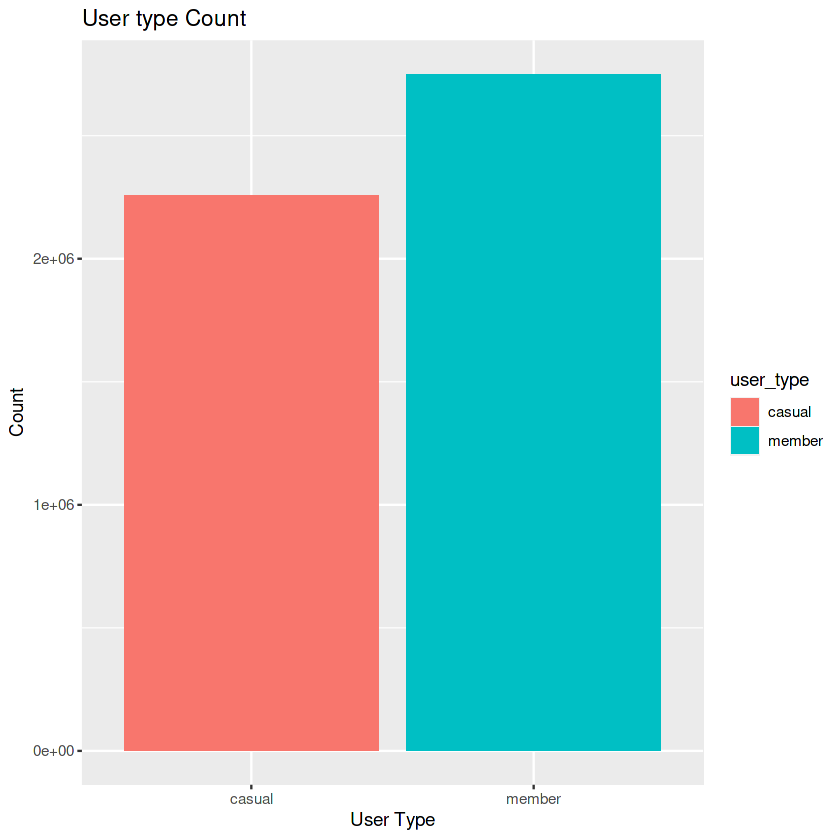

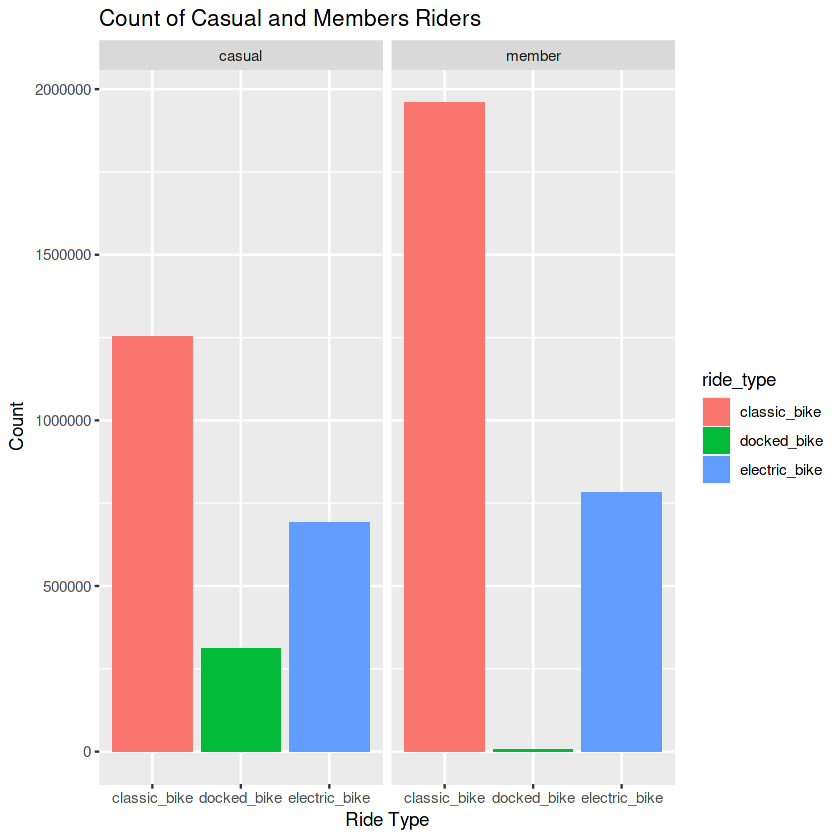

In [20]:
# checking for the count of members and casual riders
table(bike_share$user_type)
table(bike_share$ride_type)
# visualizing the user count
ggplot(bike_share, aes(user_type, fill = user_type)) +
  geom_bar() +
labs(title = 'User type Count',
    x = 'User Type',
    y = 'Count')
# casual -> 2240479
# member -> 2671814


# plotting a graph to better visualize the result
bike_share %>%
ggplot(aes(x = ride_type, fill = ride_type)) +
  geom_bar() +
  facet_wrap(~user_type) +
  labs(title = 'Count of Casual and Members Riders', 
       x = 'Ride Type',
       y = 'Count')

### Getting the total numbers of ride for each user type for each ride type and the percentage

In [21]:
df <- bike_share %>% 
  select(ride_id, user_type, ride_type) %>% 
  group_by(ride_type, user_type) %>% 
  count() %>% 
  mutate(percentage = (n/4912025*100)) %>% 
  arrange(-percentage)

head(df)

ride_type,user_type,n,percentage
<chr>,<chr>,<int>,<dbl>
classic_bike,member,1960167,39.9054769
classic_bike,casual,1253973,25.5286364
electric_bike,member,782378,15.9278098
electric_bike,casual,692363,14.0952662
docked_bike,casual,312097,6.3537339
docked_bike,member,7773,0.1582443


### Getting the no of rides for each month


month,user_type,n
<ord>,<chr>,<int>
Jan,casual,18095
Jan,member,78631
Feb,casual,8613
Feb,member,34381
Mar,casual,83918
Mar,member,144399


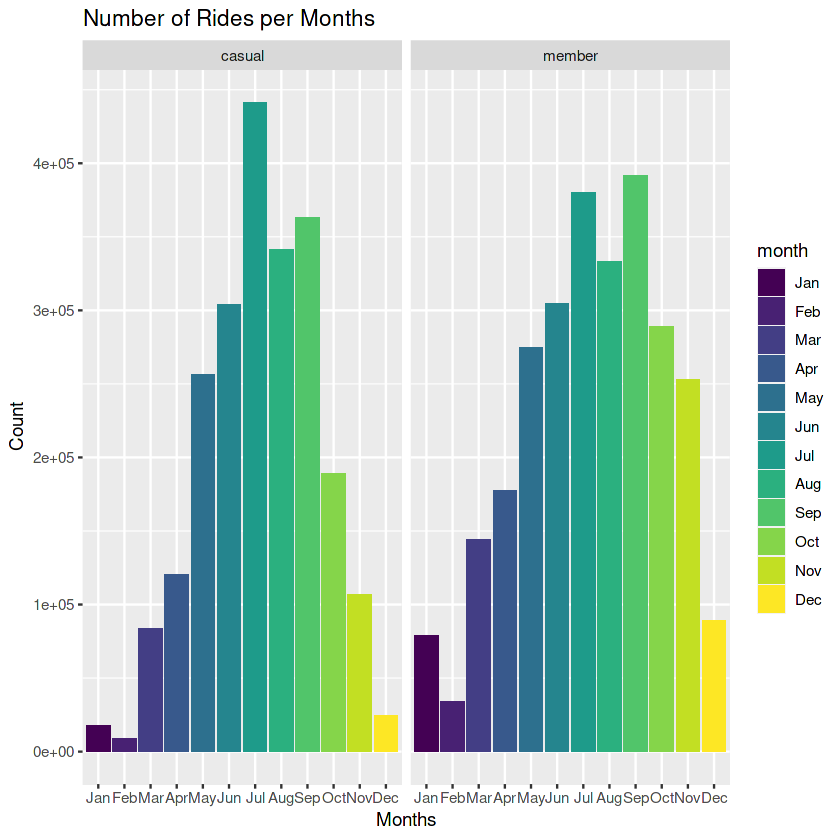

In [22]:
# Getting the no of rides for each weekday  
  df_month <- bike_share %>% 
    select(user_type, month) %>% 
    group_by(month, user_type) %>% 
    count() %>% 
    arrange()

head(df_month)

# Visualizing the number of rides per months
ggplot(df_month, aes(x=month, y=n, fill = month)) +
  geom_col() +
  facet_wrap(~user_type) +
  labs(title = 'Number of Rides per Months',
       x = 'Months',
       y = 'Count')

### Getting the no of rides for each weekday


weekday,user_type,n
<ord>,<chr>,<int>
Sun,casual,438696
Mon,casual,255721
Tue,casual,241411
Wed,casual,244425
Thu,casual,250643
Fri,casual,319288


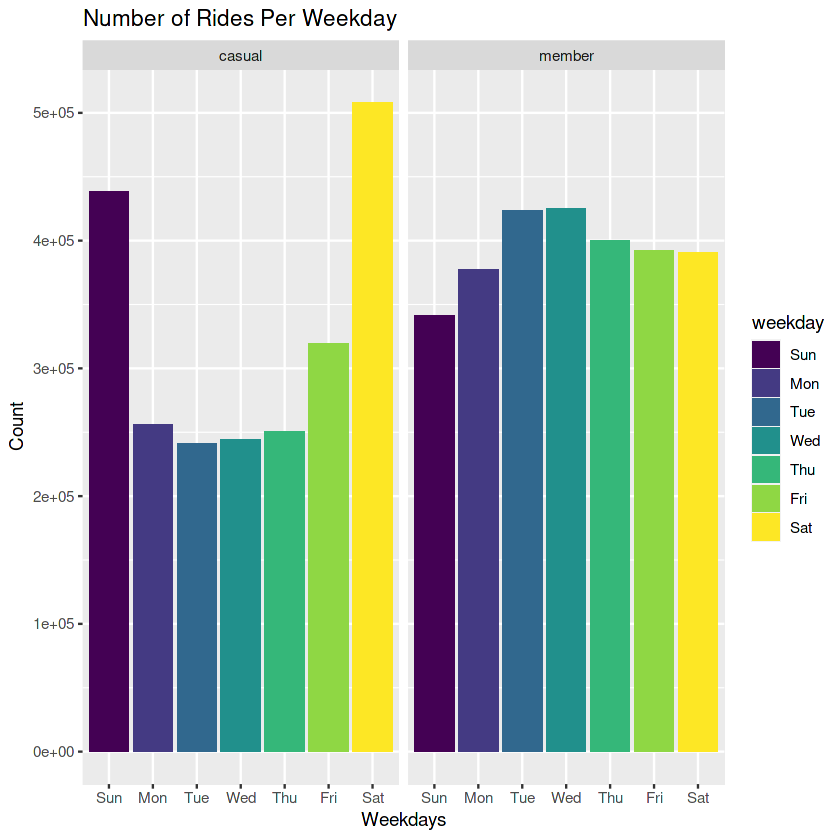

In [23]:
df_weekdays <- bike_share %>% 
  select(user_type, weekday) %>% 
  group_by(weekday, user_type) %>% 
  count() %>% 
  arrange(user_type)

head(df_weekdays)

# Visualizing the data
ggplot(df_weekdays, aes(weekday, y=n, fill = weekday)) +
  geom_col(position = "dodge") +
  facet_wrap(~user_type) +
  labs(title = "Number of Rides Per Weekday",
       x = 'Weekdays',
       y = 'Count')

### Getting the number of rides for each hour of the day

hour,user_type,n
<dbl>,<chr>,<int>
0,casual,47310
1,casual,34291
2,casual,21979
3,casual,11886
4,casual,8124
5,casual,10438


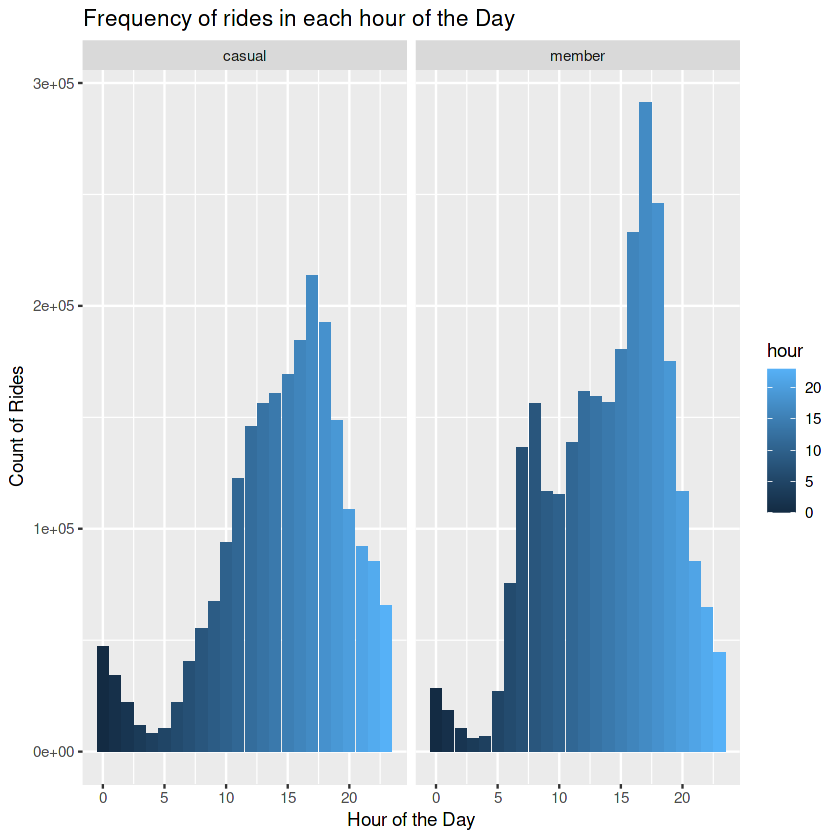

In [24]:
df_hour <- bike_share %>% 
  select(hour, user_type) %>% 
  group_by(hour, user_type) %>% 
  count() %>% 
  arrange(user_type)

head(df_hour)

# visualizing the data
ggplot(df_hour, aes(hour, n, fill = hour)) +
  geom_col() +
  facet_wrap(~user_type) +
  labs(title = 'Frequency of rides in each hour of the Day',
       x = 'Hour of the Day',
       y = 'Count of Rides')

In [25]:
#finding the mean duration
bike_share %>% 
  select(user_type, duration) %>% 
  summarise(mean_duration = mean(duration))

# Creating a dataframe for only casual riders
duration_casual <- bike_share %>% 
  filter(user_type == 'casual')

# getting the average duration for casual riders 
duration_casual %>% 
  select(user_type, duration) %>% 
  summarise(mean_duration = mean(duration))

# Creating a dataframe for only member riders
duration_member <- bike_share %>% 
  filter(user_type == 'member')

# getting the average duration for member riders
duration_member %>% 
  select(user_type, duration) %>% 
  summarise(mean_duration = mean(duration))

mean_duration <- bike_share %>% 
  group_by(user_type) %>% 
  summarise(mean_time = mean(duration))

mean_duration
<drtn>
21.49907 mins


mean_duration
<drtn>
31.39289 mins


mean_duration
<drtn>
13.37472 mins



* Mean duration of ride is 21.6 mins
* Mean duration for Casual riders -> 31.4mins
* Mean duration for Member riders -> 13.4mins


Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



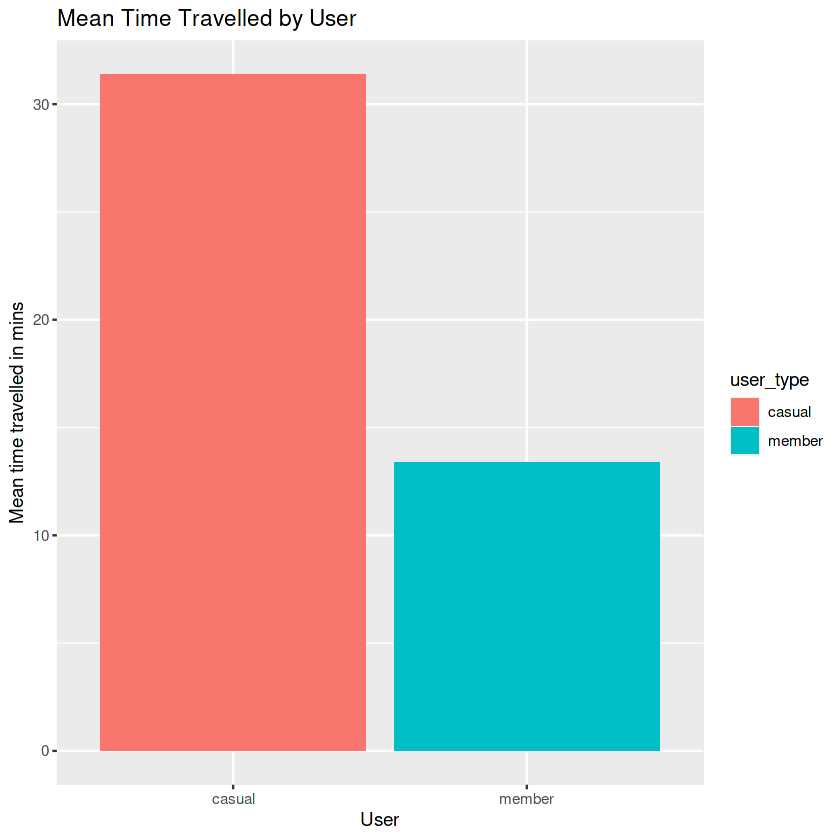

In [26]:
# visualizing the mean duration for each user type
ggplot(mean_duration, aes(user_type, mean_time,
                          fill = user_type)) +
  geom_col() +
  labs(title = 'Mean Time Travelled by User',
       x = 'User',
       y = 'Mean time travelled in mins')

## PHASE 5 - Share

### Conclusions:

* Casual riders make more use of docked bike than bike share members who makes more use of classic bikes.
* Highest activity during summer - Casual and member riders are seen to be more active between July and September
* From the analysis above, casual riders are seen to be very active during the weekends (Saturday and Sunday) indicating that they probably use this service for leisure. While members activity is evenly distributed across the week indicating that they might be using the bike share service as a means of transportation to work on a daily basis (we'll need more data to support this).
* Casual and member riders are usually seen to use the service more in the evening period.
* Casual riders average ride time is three times of that of members

### Recommendations

* Discounts should be given on weekends to casual riders when they use the bike share service most.

* Ads could also be created outlining the benefits of resorting to using bikes to commute to work on a daily basis - like how it is a form of exercise and helps maintain good health and also how it contributes to maintaining a green environment.

* Since more of the casual riders make more use of docked bikes, plans on getting more docked bikes in place should be considered.

